<a href="https://colab.research.google.com/github/emanuel379/Series-Temporais-e-Aprendizado-Dinamico/blob/main/M%C3%B3dulo_2_Estat%C3%ADstica_Bayesiana_An%C3%A1lise_de_s%C3%A9ries_temporais_University_of_California%2C_Santa_Cruz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O conjunto de dados abaixo corresponde a uma parte de um eletroencefalograma (EEG) registrado em um local específico do couro cabeludo de um indivíduo. O conjunto de dados original do EEG foi originalmente registrado a 256 Hz, mas depois foi subamostrado a cada seis observações, de modo que a taxa de amostragem resultante é de cerca de 42,7 observações por segundo. O conjunto de dados abaixo tem 400 observações que correspondem a aproximadamente 9,36 segundos.



O  senhor usará um AR(8) para modelar esse conjunto de dados e obter a estimativa de máxima verossimilhança e a inferência bayesiana para os parâmetros do modelo. Para isso, o senhor precisará fazer o seguinte:

**1. Faça o download do conjunto de dados e desenhe-o no R.** Carregue uma imagem do gráfico que exibe os dados e comente as características dos dados. Eles apresentam alguma tendência ou comportamento quase periódico?

**2. Modifique o código abaixo para obter os estimadores de máxima verossimilhança (MLEs) para os coeficientes de AR sob a verossimilhança condicional.** Para isso, o senhor assumirá um modelo autorregressivo de ordem 𝑝 = 8. Os parâmetros do modelo são 𝜙 = (𝜙1,…,𝜙8) e 𝑣. O senhor calculará o MLE de 𝜙, denotado como 𝜙^.

**3. Obtenha um estimador sem viés para a variância observacional do AR(8).** O senhor calculará o estimador não tendencioso para
𝑣, denotado como 𝑠^2.

**4. Modifique o código abaixo para obter 500 amostras da distribuição posterior dos parâmetros 𝜙 = (𝜙1,…,𝜙8) e 𝑣.** Depois de obter amostras da distribuição posterior, o senhor calculará as médias posteriores de 𝜙 e 𝑣, denotadas como
𝜙^ e 𝑣^, respectivamente.  

**5. Modifique o código abaixo para usar a função polyroot e obter os módulos e períodos das raízes recíprocas do polinômio AR avaliado na média a posteriori 𝜙^.**


A primeira parte do código R abaixo calcula o MLE para os coeficientes AR e o estimador não tendencioso para a variação sob a probabilidade condicional para um exemplo AR(2) com dados simulados.  A segunda parte do código nos permite obter amostras da distribuição a posteriori dos parâmetros do processo AR(2) sob a verossimilhança condicional e a referência prévia. O senhor terá de modificar esse código para analisar os dados de EEG com um AR(8) e prosseguir com as etapas 2, 3 e 4 acima.




 MLE of conditional likelihood for phi:  1.647972 -0.91087 
 Estimate for v:  0.9627054 


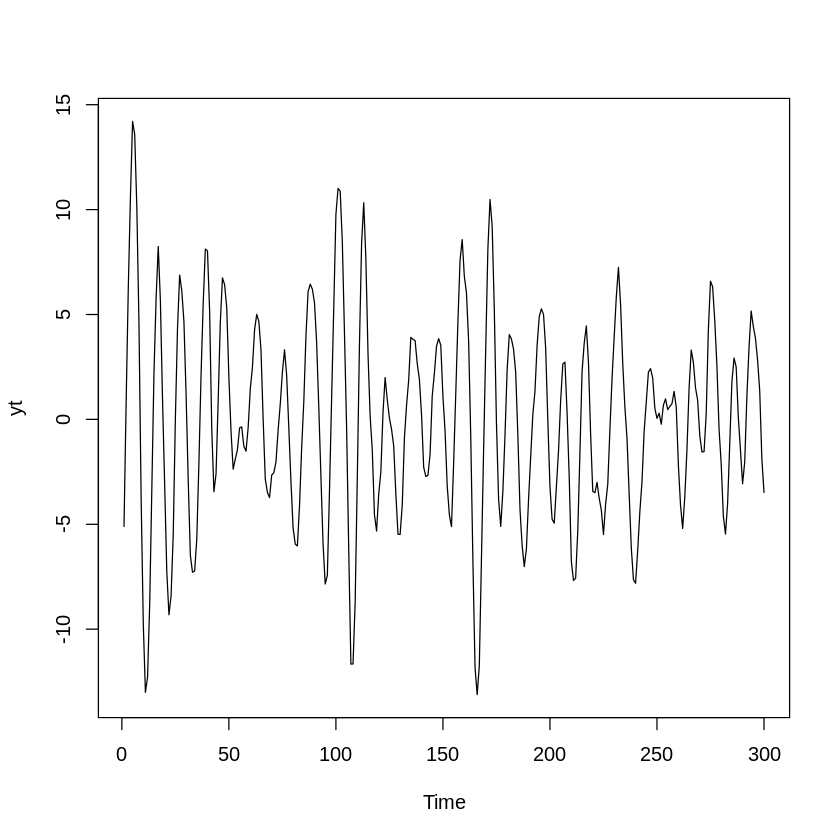

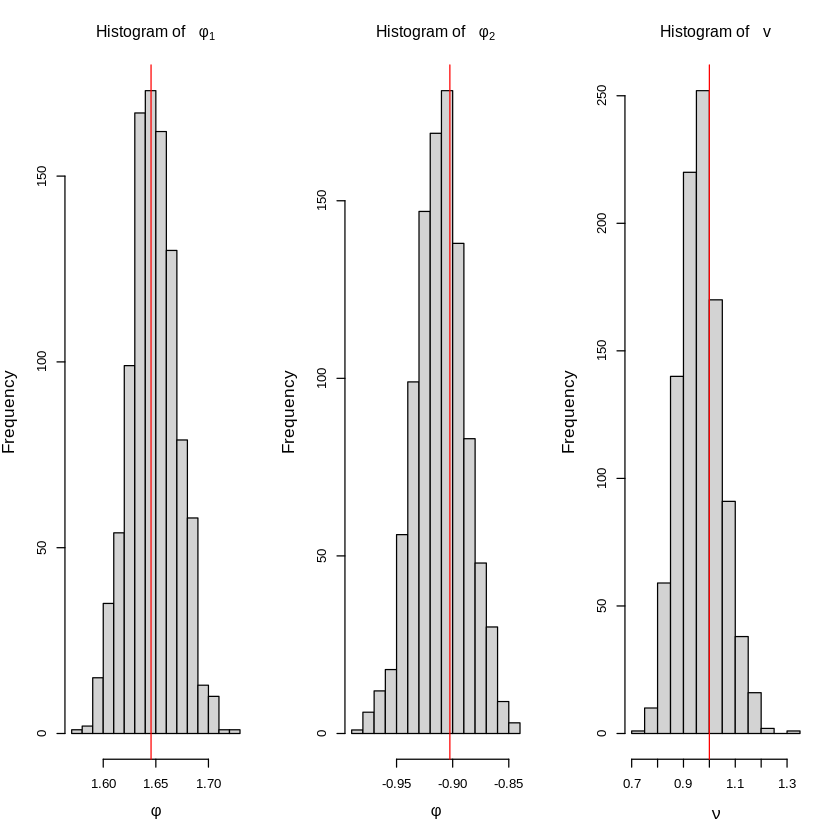

In [16]:
set.seed(2021)
r=0.95
lambda=12
phi=numeric(8)
phi[1]=2*r*cos(2*pi/lambda)
phi[2]=-r^2
sd=1 # innovation standard deviation
T=300 # number of time points
# generate stationary AR(2) process
yt=arima.sim(n = T, model = list(ar = phi), sd = sd)
par(mfrow=c(1,1))
plot(yt)

## Case 1: Conditional likelihood
p=2
y=rev(yt[(p+1):T]) # response
X=t(matrix(yt[rev(rep((1:p),T-p)+rep((0:(T-p-1)),rep(p,T-p)))],p,T-p));
XtX=t(X)%*%X
XtX_inv=solve(XtX)
phi_MLE=XtX_inv%*%t(X)%*%y # MLE for phi
s2=sum((y - X%*%phi_MLE)^2)/(length(y) - p) #unbiased estimate for v

cat("\n MLE of conditional likelihood for phi: ", phi_MLE, "\n",
    "Estimate for v: ", s2, "\n")

#####################################################################################
##  AR(2) case
### Posterior inference, conditional likelihood + reference prior via
### direct sampling
#####################################################################################

n_sample=1000 # posterior sample size
library(MASS)

## step 1: sample v from inverse gamma distribution
v_sample=1/rgamma(n_sample, (T-2*p)/2, sum((y-X%*%phi_MLE)^2)/2)

## step 2: sample phi conditional on v from normal distribution
phi_sample=matrix(0, nrow = n_sample, ncol = p)
for(i in 1:n_sample){
  phi_sample[i, ]=mvrnorm(1,phi_MLE,Sigma=v_sample[i]*XtX_inv)
}

## plot histogram of posterior samples of phi and nu
par(mfrow = c(1, 3), cex.lab = 1.3)
for(i in 1:2){
  hist(phi_sample[, i], xlab = bquote(phi),
       main = bquote("Histogram of "~phi[.(i)]))
  abline(v = phi[i], col = 'red')
}

hist(v_sample, xlab = bquote(nu), main = bquote("Histogram of "~v))
abline(v = sd, col = 'red')

Código do exercício


 MLE of conditional likelihood for phi:  0.2722455 0.06832964 -0.1301794 -0.1478096 -0.1084817 -0.1477537 -0.2259507 -0.1363678 
 Estimate for v:  3784.705 


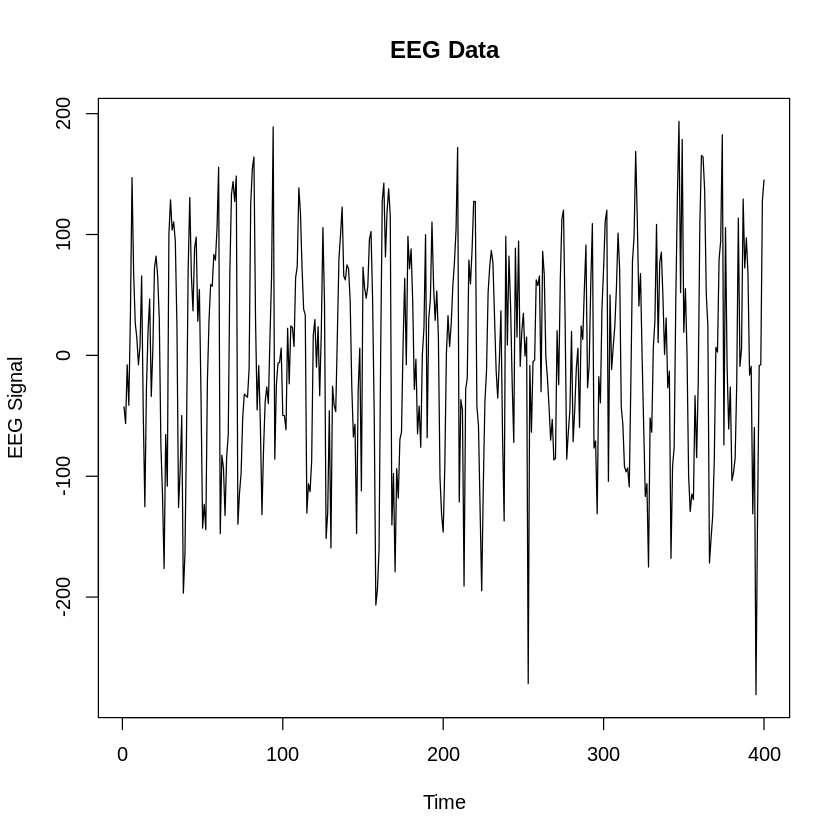

In [17]:
# Load necessary libraries
library(MASS)

# Set the seed for reproducibility
set.seed(2024)

# Read EEG data from the file
eeg_data <- read.table("EEG.txt", header = FALSE)
yt <- eeg_data$V1

# Plot the EEG data
plot(yt, type = "l", main = "EEG Data", xlab = "Time", ylab = "EEG Signal")

# Case 1: Conditional likelihood
p <- 8
y <- rev(yt[(p + 1):length(yt)]) # response
X <- t(matrix(yt[rev(rep((1:p), length(yt) - p) + rep((0:(length(yt) - p - 1)), rep(p, length(yt) - p)))], p, length(yt) - p))
XtX <- t(X) %*% X
XtX_inv <- solve(XtX)
phi_MLE <- XtX_inv %*% t(X) %*% y # MLE for phi
s2 <- sum((y - X %*% phi_MLE)^2) / (length(y) - p) # unbiased estimate for v

cat("\n MLE of conditional likelihood for phi: ", phi_MLE, "\n",
    "Estimate for v: ", s2, "\n")

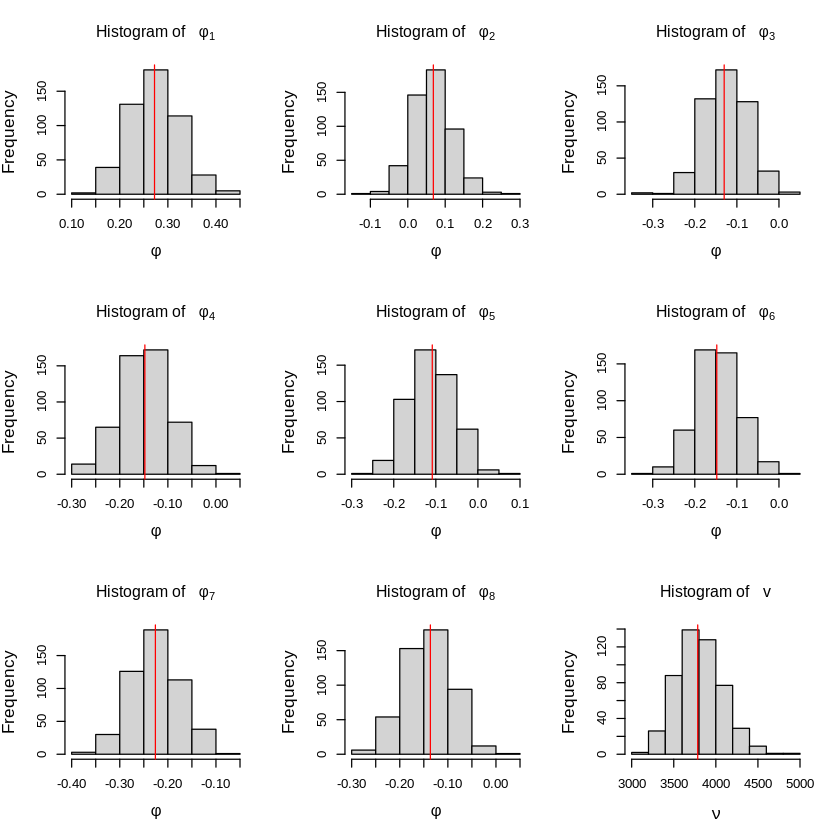

In [18]:
# AR(8) case
# Posterior inference, conditional likelihood + reference prior via direct sampling
n_sample <- 500 # posterior sample size

# Step 1: Sample v from inverse gamma distribution
v_sample <- 1 / rgamma(n_sample, (length(yt) - 2 * p) / 2, sum((y - X %*% phi_MLE)^2) / 2)

# Step 2: Sample phi conditional on v from normal distribution
phi_sample <- matrix(0, nrow = n_sample, ncol = p)
for (i in 1:n_sample) {
  phi_sample[i, ] <- mvrnorm(1, phi_MLE, Sigma = v_sample[i] * XtX_inv)
}

# Plot histogram of posterior samples of phi and nu
par(mfrow = c(3, 3), cex.lab = 1.3)
for (i in 1:p) {
  hist(phi_sample[, i], xlab = bquote(phi), main = bquote("Histogram of "~phi[.(i)]))
  abline(v = phi_MLE[i], col = 'red')
}

hist(v_sample, xlab = bquote(nu), main = bquote("Histogram of "~v))
abline(v = s2, col = 'red')

In [19]:
# Calculate posterior mean of phi
phi_posterior_mean <- colMeans(phi_sample)

# Use polyroot to find the roots of the AR polynomial
ar_poly <- c(1, -phi_posterior_mean)
roots <- polyroot(ar_poly)

# Calculate magnitudes and periods of the reciprocal roots
magnitudes <- 1 / Mod(roots)
periods <- 2 * pi / Arg(roots)

cat("\nPosterior mean of phi: ", phi_posterior_mean, "\n")
cat("\nMagnitudes of reciprocal roots: ", magnitudes, "\n")
cat("\nPeriods of reciprocal roots: ", periods, "\n")


Posterior mean of phi:  0.2716178 0.06679791 -0.1266484 -0.1481978 -0.1109333 -0.1450724 -0.2249406 -0.1403494 

Magnitudes of reciprocal roots:  0.9700241 0.7213792 0.7213792 0.9700241 0.8078596 0.6627095 0.8078596 0.6627095 

Periods of reciprocal roots:  12.74624 2.996409 -2.996409 -12.74624 5.113033 2.233232 -5.113033 -2.233232 
